In [1]:
# Tests

In [2]:
## Load Dependencies and configurations

In [3]:
from pathlib import Path
import matplotlib.pyplot as plt

In [4]:
from src.model import load_history

2022-09-29 21:39:57.325240: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-29 21:39:57.927157: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-29 21:40:00.367537: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/philipp/miniconda3/envs/evidence/lib/
2022-09-29 21:40:00.367929: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfe

In [3]:
name = "cifar10"
run = "test"

In [4]:
run_path = Path(f"./models/{name}/{run}").resolve()

In [5]:
for f in run_path.iterdir():
    if f.is_dir():
        print(f)
        break

/home/philipp/projects/evidence-regularizer/models/cifar10/test/l1


In [6]:
model, history, model, compile, fit = load_model(f)

2022-09-29 20:56:03.544670: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-09-29 20:56:03.684511: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-09-29 20:56:03.686655: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-09-29 20:56:03.691310: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

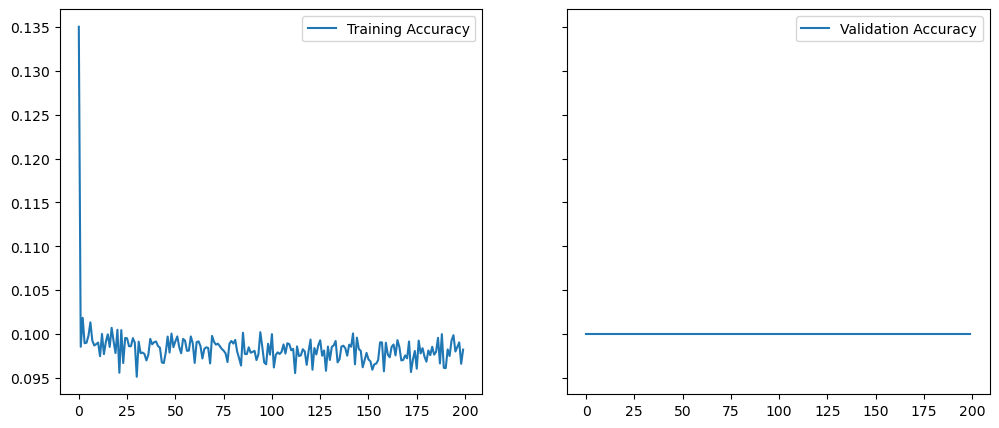

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5), squeeze=True, sharey=True)
ax[0].plot(history['accuracy'], label='Training Accuracy')
ax[0].legend()
ax[1].plot(history['val_accuracy'], label='Validation Accuracy')
ax[1].legend()
plt.show()

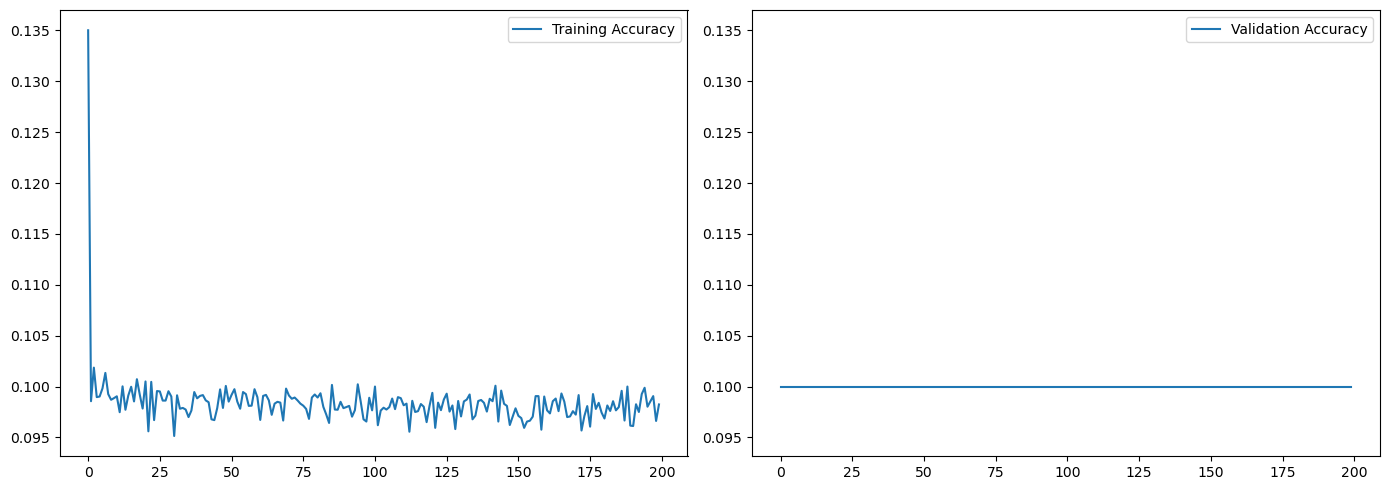

In [42]:
fig = plt.figure(figsize=(14,5), tight_layout=True)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, sharey=ax1)

ax1.plot(history['accuracy'], label='Training Accuracy')
ax2.plot(history['val_accuracy'], label='Validation Accuracy')
ax1.legend()
ax2.legend()

plt.show()

In [47]:
f.parts[-1].replace('_', ' ').title()

'L1'

In [24]:
def plot_experiment(name, run, what='accuracy', start_epoch=None, end_epoch=None):
    
    run_path = Path(f"./models/{name}/{run}").resolve()
    
    fig = plt.figure(figsize=(14,5), tight_layout=True)
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.set_title('Training Data')
    ax1.set_ylabel(what.title())
    ax1.set_label(what.title())
    ax2 = fig.add_subplot(1, 2, 2, sharey=ax1)
    ax2.set_title('Validation Data')
    ax2.set_label(what.title())
    
    if start_epoch is None:
        start_epoch = 0
    for f in run_path.iterdir():
        if f.is_dir():
            history = load_history(f)
            name = f.parts[-1].replace('_', ' ').title()
            if end_epoch is None:
                end_epoch = len(history[what])
            ax1.plot(range(start_epoch, end_epoch), history[what][start_epoch:end_epoch], label=name)
            ax2.plot(range(start_epoch, end_epoch), history[f'val_{what}'][start_epoch:end_epoch], label=name)
    ax1.legend()
    ax2.legend()
    
    return fig, (ax1, ax2)

In [25]:
name = 'cifar10'
run = 'test'

(<Figure size 1400x500 with 2 Axes>,
 (<AxesSubplot:label='Accuracy', title={'center':'Training Data'}, ylabel='Accuracy'>,
  <AxesSubplot:label='Accuracy', title={'center':'Validation Data'}>))

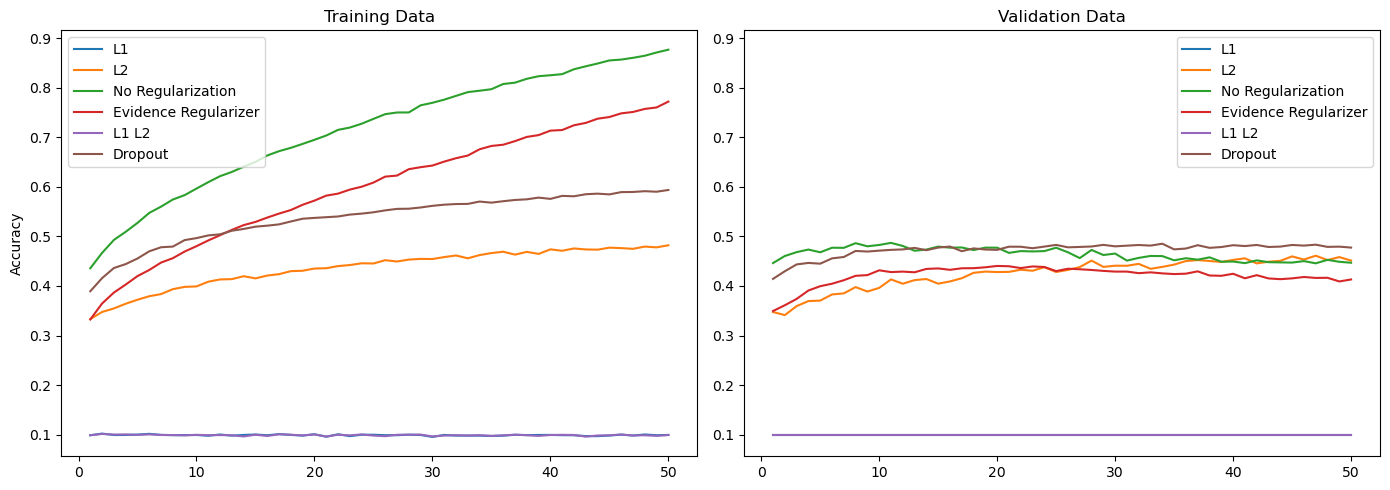

In [27]:
plot_experiment(name=name, run=run, start_epoch=1, end_epoch = 51)